In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_49422_I')

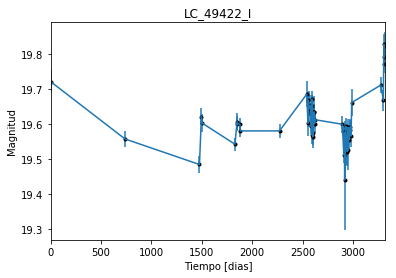

In [2]:
data = np.genfromtxt('LC_49422_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_49422_I')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

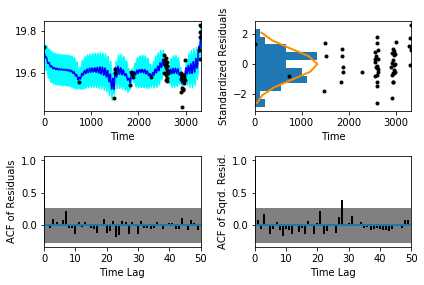

In [5]:
sample.assess_fit()

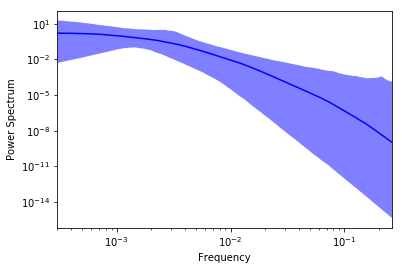

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_49422_I')

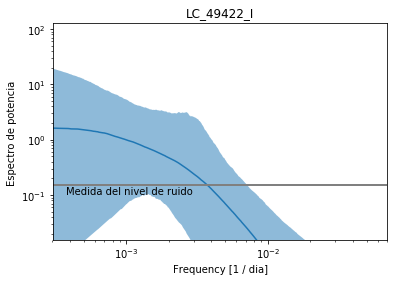

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_49422_I')

Text(0.5,1,'Prediccion , valor esperado LC_49422_I')

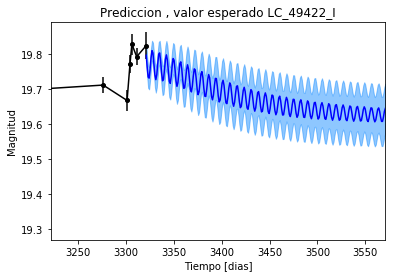

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_49422_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_ 49422_I')

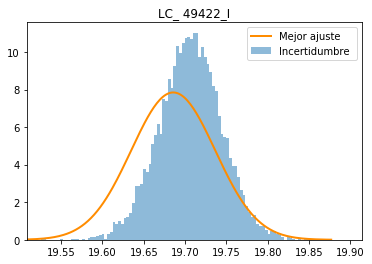

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_ 49422_I')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_I')

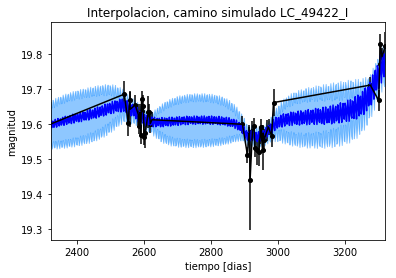

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_I')

Text(0.5,1,'Interpolacion, camino simulado LC_49422_I')

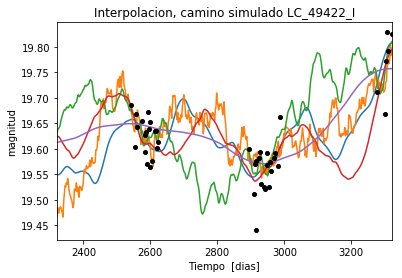

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_49422_I')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 736.931765033
Median: 0.00788416177933
Standard deviation: 0.0933550057149
68% credibility interval: [ 0.00079878  0.09434105]
95% credibility interval: [  3.44034621e-04   3.71268224e-01]
99% credibility interval: [  3.09553267e-04   4.79713978e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 351.044919367
Median: 0.00279357218411
Standard deviation: 0.0481053807966
68% credibility interval: [ 0.00057119  0.02692681]
95% credibility interval: [ 0.00032908  0.17623494]
99% credibility interval: [ 0.00030871  0.29646342]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 570.84551776
Median: 0.0170317932827
Standard deviation

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1102.56063338
Median: 106.402032356
Standard deviation: 1.66293612934
68% credibility interval: [ 104.57149132  107.625948  ]
95% credibility interval: [ 102.25621501  108.58266449]
99% credibility interval: [ 100.28682424  109.65068531]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 574.038586673
Median: 0.456238065352
Standard deviation: 1.15805300602
68% credibility interval: [ 0.06095524  2.17038911]
95% credibility interval: [ 0.0172336  3.9049081]
99% credibility interval: [ 0.01150064  5.42837326]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 380.617703565
Median: 0.273018835877
Standard deviation: 2.75818099164
68% credibility interval: [ 0.01145841  3.32443996]
95% credibility interval: [  1.06956711e-03 

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1451.50771126
Median: 2.45752000571e-19
Standard deviation: 1.05643231912e+94
68% credibility interval: [  9.22605834e-57   2.67415090e+21]
95% credibility interval: [  2.55872686e-98   4.76268864e+83]
99% credibility interval: [  9.88548769e-158   5.40176868e+090]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1972.79628014
Median: 19.6233989531
Standard deviation: 0.0417554164525
68% credibility interval: [ 19.59234025  19.65848096]
95% credibility interval: [ 19.55312077  19.7197147 ]
99% credibility interval: [ 19.50156664  19.76821517]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 217.973778047
Median: 0.0226092581221
Standard deviation: 0.140867712743
68% credibility interval: [ 0.          0.24781542]
95% credibility interval: [ 0.          0.47587107]
99% credibility interval: [ 0.          0.51561673]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 217.973778047
Median: 0.0226092581221
Standard deviation: 0.140867712743
68% credibility interval: [ 0.          0.24781542]
95% credibility interval: [ 0.          0.47587107]
99% credibility interval: [ 0.          0.51561673]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 773.945146981
Median: 0.0
Standard deviation: 0.00113937535102
68% cre

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1102.56063338
Median: 106.402032356
Standard deviation: 1.66293612934
68% credibility interval: [ 104.57149132  107.625948  ]
95% credibility interval: [ 102.25621501  108.58266449]
99% credibility interval: [ 100.28682424  109.65068531]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2474.01616393
Median: 0.00764368616774
Standard deviation: 0.0104558547831
68% credibility interval: [ 0.00447762  0.015179  ]
95% credibility interval: [ 0.0027338   0.03533811]
99% credibility interval: [ 0.00207853  0.06389602]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1765.61650058
Median: 1.29720771874
Standard deviation: 0.2336997334
68% credibility interval: [ 1.07423342  1.53869394]
95% credibility interval: [ 0.8907764   1.82196887]
99% credibility interval: [ 0.78067931  1.93912216]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1407.14337171
Median: 4.29713007715e-05
Standard deviation: 0.0233503971697
68% credibility interval: [  3.00437951e-26   2.87815513e-03]
95% credibility interval: [  5.73335998e-87   6.39885245e-02]
99% credibility interval: [  1.67409156e-94   1.63164211e-01]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 736.931765033
Median: (-0.0495376494513-2.80956011648j)
Standard deviation: 1.06181871325
68% credibility interval: [-0.59276231-0.13598103j -0.00501887-0.36115408j]
95% credibility interval: [ -2.33274705e+00+0.j          -2.16163327e-03-0.00197096j]
99% credibility interval: [ -3.01413182e+00+0.j          -1.94498054e-03-0.82496452j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 351.044919367
Median: (-0.0175525317017+2.34684694745j)
Standard deviation: 0.93528416369
68% credibility interval: [-0.16918616+0.82406173j -0.00358892+0.j        ]
95% credibility interval: [-1.10731678+0.j -0.00206767+0.j]
99% credibility interval: [-1.86273463+2.34342424j -0.00193969+0.03368999j]
Posterior summary for parameter ar_roots